<a href="https://colab.research.google.com/github/poonampal/AIML/blob/master/Neural_Network_for_Handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Network for Handwritten digits

In [55]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [32]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [33]:
x_train.shape

(60000, 28, 28)

In [34]:
y_train.shape

(60000,)

In [35]:
x_test.shape

(10000, 28, 28)

In [36]:
y_test.shape

(10000,)

In [37]:
x_train_flatten = x_train.reshape(len(x_train),  28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [43]:
x_train_flatten = x_train_flatten / 255
x_test_flatten = x_test_flatten /255

In [44]:
x_train_flatten.shape

(60000, 784)

In [39]:
x_test_flatten.shape

(10000, 784)

In [45]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [63]:
model = keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(10,activation ='sigmoid')
])

model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy() , metrics=['accuracy'])

In [64]:
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2710 - accuracy: 0.9243
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1251 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0885 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0675 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0538 - accuracy: 0.9833


In [65]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0740 - accuracy: 0.9766


[0.07398548722267151, 0.9765999913215637]

In [66]:
predictions = model.predict(x_test_flatten)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([7.3667713e-02, 2.5682124e-05, 4.7941634e-01, 7.8562337e-01,
       1.2425235e-05, 8.8813268e-03, 4.3865793e-08, 9.9988991e-01,
       1.1328791e-01, 7.4076015e-01], dtype=float32)

In [67]:
y_test[0]

7

In [68]:
np.argmax(predictions[0])

7

In [69]:
predictions = [np.argmax(i) for i in predictions]

In [70]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=predictions)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    2,    1,    1,    2,    3,    0,    1,    1],
       [   0, 1123,    3,    1,    0,    1,    2,    0,    5,    0],
       [   3,    1, 1012,    3,    1,    0,    2,    6,    4,    0],
       [   0,    0,    9,  985,    0,    2,    0,    5,    5,    4],
       [   2,    1,    3,    1,  955,    1,    3,    3,    0,   13],
       [   2,    1,    1,   12,    2,  855,    8,    1,    6,    4],
       [   3,    3,    1,    1,    2,    2,  943,    0,    3,    0],
       [   2,    8,    9,    2,    1,    0,    0,  989,    3,   14],
       [   2,    1,    3,    5,    2,    2,    1,    4,  950,    4],
       [   2,    3,    0,    5,    7,    2,    1,    3,    1,  985]],
      dtype=int32)>

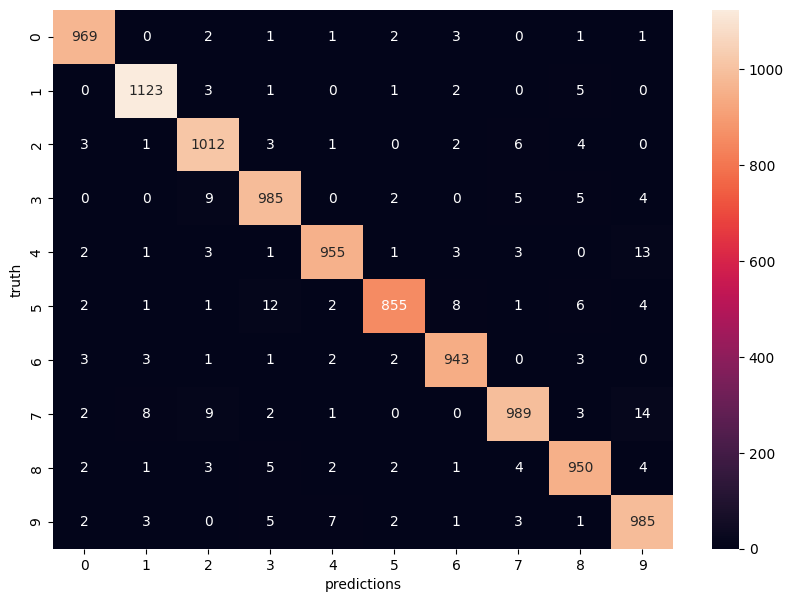

In [71]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predictions')
plt.ylabel('truth')
plt.show()